In [ ]:
# 농어주문상승 -> 농어를 무게 단위로 판매하려 함
# 공급처에서 잘못 측정했을 가능성 -> 재 측정해야함
# 다른 데이터는 정상범위가 있으니 예측할 수 있을까? -> 이걸 회귀라고 함

# 외부에서 56개의 샘플을 받아서 처리해보자
# 지도학습은 크게 2가지로 나누어짐 - 분류/회귀

# 분류 (2진분류) Classifier
# 회귀 (예측: 확률(임의의 어떤 숫자로 예측)) Regressor

# 회귀: 두 변수 사이에 상관관계를 분석하는 방법

In [1]:
# 리눅스 명령어로 나눔폰트 설치/적용 (차트 한글처리)
!sudo apt-get install -y fonts-nanum # sudo 는 관리자권한
!sudo fc-cache -fv # 폰트 캐시를 새로 생성 f 강제 v 진행과정출력
!rm ~/.cache/matplotlib -rf # Matplotlib이 캐시된 폰트 설정을 유지하기 때문에, 새로운 폰트를 적용하려면 기존 캐시를 삭제해야 함.
# 설치 후에 세션 다시시작

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 29 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (11.1 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 124947 files and direc

In [12]:
import numpy as np

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

print(len(perch_length))
print(len(perch_weight))

56
56


기초자료


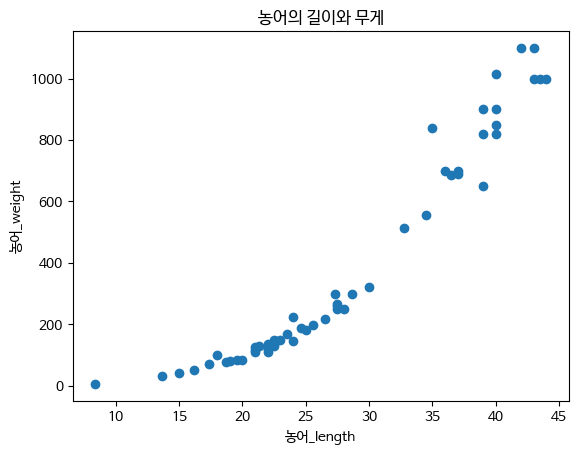

In [4]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') # 한글처리

plt.scatter(perch_length, perch_weight)
plt.xlabel('농어_length')
plt.ylabel('농어_weight')
print('기초자료')
plt.title('농어의 길이와 무게')
plt.show()

In [ ]:
# k-최근접 이웃 알고리즘에서의 회귀 (Regressor)

# 예측하려는 샘플에 가장 가까운 샘플 k개를 선택
# 이 샘플들의 클래스를 확인하여 다수 클래스를 새로운 샘플의 클래스로 예측
# 타겟값 100,80,60 의 평균이 타겟값으로 사용됨

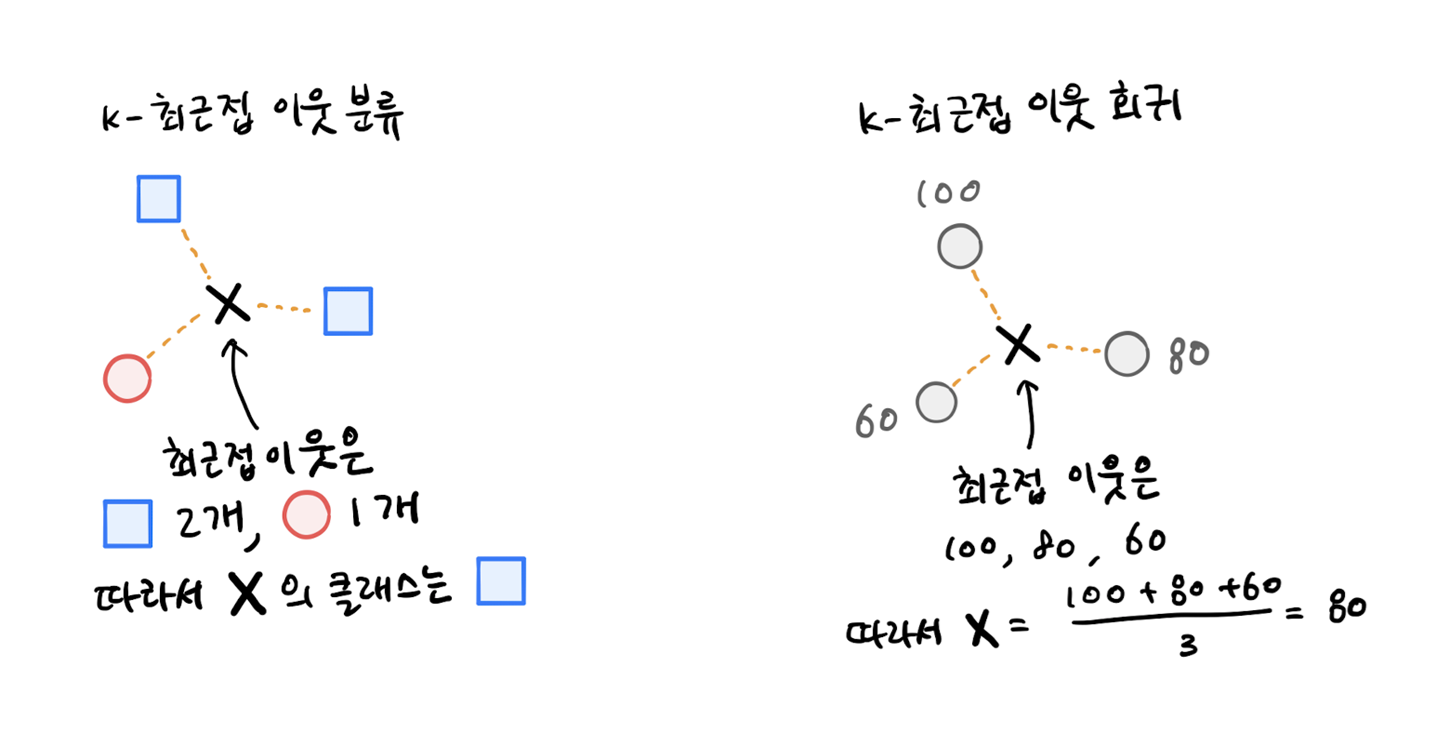

In [16]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)
# stratify 미사용(분류용). 정답파일이 무게이기 때문

print(train_input.shape)

(42,)


In [22]:
test_array = np.array([1,2,3,4])
print(test_array.shape) # (4,) 의 1차원배열
print(test_array)

(4,)
[1 2 3 4]


In [21]:
test_array = test_array.reshape(2,2) # 2차원배열로 변환
print(test_array.shape)
print(test_array)

(2, 2)
[[1 2]
 [3 4]]


In [35]:
train_input = train_input.reshape(-1,1) # -1 은 원소 개수 전부를 의미. 즉 지금은 42
test_input = test_input.reshape(-1,1)
print(train_input.shape, test_input.shape)
print(train_input) # 길이(length)밖에 없는상태

(42, 1) (14, 1)
[[19.6]
 [22. ]
 [18.7]
 [17.4]
 [36. ]
 [25. ]
 [40. ]
 [39. ]
 [43. ]
 [22. ]
 [20. ]
 [22. ]
 [24. ]
 [27.5]
 [43. ]
 [40. ]
 [24. ]
 [21. ]
 [27.5]
 [40. ]
 [32.8]
 [26.5]
 [36.5]
 [13.7]
 [22.7]
 [15. ]
 [37. ]
 [35. ]
 [28.7]
 [23.5]
 [39. ]
 [21. ]
 [23. ]
 [22. ]
 [44. ]
 [22.5]
 [19. ]
 [37. ]
 [22. ]
 [25.6]
 [42. ]
 [34.5]]


In [36]:
from sklearn.neighbors import KNeighborsRegressor # 회귀

knr = KNeighborsRegressor()
knr.fit(train_input, train_target)

KNeighborsRegressor()

In [40]:
knr.score(test_input, test_target) # 99.3%
# 회귀의 경우 평가방식
# R^2 = 1 - ((타겟-예측)^2 의 합) / ((타겟-평균)^2 의 합)
# 예측이 타겟에 가까워질수록 R^2 이 1에 가까워짐. 평균에 가까워지면 0에 가까워짐.
# 음수값이 나온다면 평균 예측보다도 더 나쁜 예측을 한다는 것을 의미

0.992809406101064

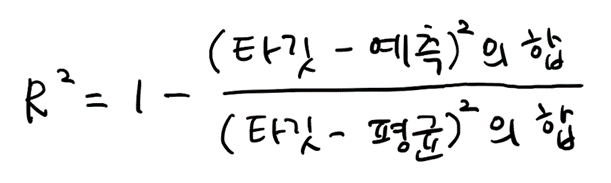

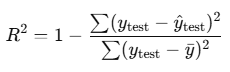

In [41]:
knr.predict([[15]]) # 15cm인 농어의 무게예측 -> 60g

array([60.])

In [51]:
from sklearn.metrics import mean_absolute_error # 평균으로 절댓값의 오차를 찾는 메서드

test_prediction = knr.predict(test_input)

mae = mean_absolute_error(test_target, test_prediction)
# 테스트셋에 대한 평균 절댓값 오차계산

print(mae) # 약 19g

39.24285714285714


In [43]:
print(knr.score(train_input, train_target)) # 97%
# 테스트셋은 99.3% 이었으니 과소적합

0.9698823289099254


In [64]:
# 훈련셋 >> 테스트셋 : 과대 적합(오버피팅).  차이가 큰경우
# 훈련셋 < 테스트셋 : 과소 적합.   두 점수가 모두 낮은경우도 해당함

knr.n_neighbors = 3 # 이웃수 5->3
knr.fit(train_input, train_target) # 재훈련
print(knr.score(train_input, train_target)) # 98%
print(knr.score(test_input, test_target)) # 97.5%

0.9804899950518966
0.9746459963987609


In [46]:
knr.predict([[15]]) # 15cm -> 47.3g

array([47.33333333])

In [65]:
test_prediction = knr.predict(test_input)

mae = mean_absolute_error(test_target, test_prediction)
# 테스트셋에 대한 평균 절댓값 오차계산

print(mae) # 약 35g

35.42380952380951


n = 1, MAE = 22.7
train: 98.5  test: 99.1

n = 2, MAE = 35.3
train: 98.3  test: 97.3

n = 3, MAE = 35.4
train: 98.0  test: 97.5

n = 4, MAE = 28.4
train: 97.8  test: 98.4

n = 5, MAE = 19.2
train: 97.0  test: 99.3

n = 6, MAE = 28.4
train: 97.6  test: 98.6

n = 7, MAE = 32.5
train: 97.6  test: 97.8

n = 8, MAE = 34.9
train: 97.0  test: 97.8

n = 9, MAE = 44.0
train: 96.9  test: 96.9

n = 10, MAE = 39.2
train: 96.2  test: 97.4

n = 11, MAE = 43.4
train: 95.2  test: 97.0

n = 12, MAE = 44.4
train: 94.7  test: 96.8

n = 13, MAE = 45.4
train: 94.1  test: 96.4

n = 14, MAE = 48.1
train: 94.3  test: 96.2

n = 15, MAE = 49.9
train: 93.0  test: 95.5



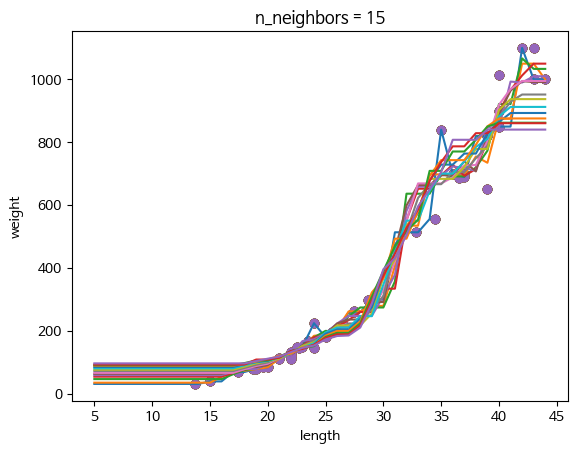

In [86]:
# 하이퍼파라미터 조정을 일일이 하기엔 무리가 있음 -> for 문 사용

# k-최근접 이웃 회귀 객체를 만듭니다
knr = KNeighborsRegressor()
# 5에서 45까지 x 좌표를 만듭니다
x = np.arange(5, 45).reshape(-1, 1)

# n = 1, 3, 5, 10일 때 예측 결과를 그래프로 그립니다.
for n in range(1, 16):
    # 모델 훈련
    knr.n_neighbors = n
    knr.fit(train_input, train_target)
    # 지정한 범위 x에 대한 예측 구하기
    prediction = knr.predict(x)
    test_prediction = knr.predict(test_input)
    mae = round(mean_absolute_error(test_target, test_prediction),1)
    print(f"n = {n}, MAE = {mae}")  # n 값과 MAE 출력
    train_score = round(knr.score(train_input, train_target) * 100, 1)
    test_score = round(knr.score(test_input, test_target) * 100, 1)

    print(f"train: {train_score}  test: {test_score}")
    # 훈련 세트와 예측 결과 그래프 그리기
    print()
    plt.scatter(train_input, train_target)
    plt.plot(x, prediction)
    plt.title('n_neighbors = {}'.format(n))
    plt.xlabel('length')
    plt.ylabel('weight')
    # plt.show()

# MAE 값이 가장 낮은 n=5 가 최적의 파라미터